In [107]:
%tensorflow_version 2.x

In [108]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [148]:
(images_train,labels_train),(images_test,labels_test)=tf.keras.datasets.mnist.load_data()

In [149]:
images_test.shape
labels_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [150]:
labels_test=np.array(labels_test).reshape(-1,1)
labels_train=np.array(labels_train).reshape(-1,1)
labels_train.shape

(60000, 1)

In [151]:
onehot=OneHotEncoder()
onehot.fit(labels_train)
labels_train=onehot.transform(labels_train)
labels_test=onehot.transform(labels_test)
labels_test=labels_test.toarray()
labels_train=labels_train.toarray()

In [152]:
labels_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
images_test=np.array(images_test).reshape(-1,784)/255
images_train=np.array(images_train).reshape(-1,784)/255

In [168]:
images_test=np.array(images_test).reshape(-1,28,28,1).astype('float32')
images_train=np.array(images_train).reshape(-1,28,28,1).astype('float32')

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [116]:
# using sequential Api

In [234]:
model=Sequential()
model.add(Conv2D(32,(5,5), input_shape= ( 28,28,1),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [223]:
# using fucntional api

In [224]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [231]:
inputimage=Input(shape=(28,28,1))
convolayer1=Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu',padding='same')(inputimage)
maxpoolayer1=MaxPooling2D(pool_size=(2,2))(convolayer1)
convlayer2=Conv2D(64,(5,5),activation='relu',padding='same')(maxpoolayer1)
maxpoollayer2=MaxPooling2D(pool_size=(2,2))(convlayer2)
flatten=Flatten()(maxpoollayer2)
dense1=Dense(1024,activation='relu')(flatten)
dropout1=Dropout(0.25)(dense1)
dense2=Dense(200,activation='relu')(dropout1)
dropout2=Dropout(0.25)(dense2)
output=Dense(10,activation='softmax')(dropout2)
model=Model(inputimage,output)


In [232]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              3212

In [236]:

model.fit(images_train,labels_train,validation_data=(images_test,labels_test),
         epochs=5,batch_size=50,verbose=1)

Epoch 1/5
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0530 - accuracy: 0.9859 - val_loss: 0.0594 - val_accuracy: 0.9861
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0505 - accuracy: 0.9866 - val_loss: 0.0764 - val_accuracy: 0.9860
Epoch 3/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0448 - accuracy: 0.9879 - val_loss: 0.0545 - val_accuracy: 0.9879
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0446 - accuracy: 0.9887 - val_loss: 0.0566 - val_accuracy: 0.9853
Epoch 5/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0435 - accuracy: 0.9895 - val_loss: 0.0470 - val_accuracy: 0.9890


In [153]:
#saving the model

In [154]:
from tensorflow.keras.models import model_from_json


In [157]:
model_json=model.to_json()

In [158]:
with open("model.json",'w') as jsonfile:
  jsonfile.write(model_json)

In [159]:
model.save_weights('model.h5')


In [160]:
#loading the model using jsonfile

In [161]:
from tensorflow.keras.models import model_from_json

In [163]:
model_json=open('model.json','r')
model_loaded_json=model_json.read()
model_json.close()
model_loaded=model_from_json(model_loaded_json)


In [165]:
model_loaded.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)            

In [166]:
model_loaded.load_weights('model.h5')

In [208]:
m=model_loaded.predict(images_test)


In [209]:
labels_test_predicted=np.argmax(m,1)

In [210]:
import pandas as pd

In [211]:
pd.crosstab(np.argmax(labels_test,axis=1),labels_test_predicted
            )

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,978,0,1,0,0,0,0,1,0,0
1,1,1133,0,1,0,0,0,0,0,0
2,0,0,1021,3,0,0,0,7,1,0
3,0,0,0,1009,0,1,0,0,0,0
4,0,1,1,0,960,0,3,2,0,15
5,0,0,0,17,0,873,1,0,1,0
6,3,3,0,0,1,1,949,0,1,0
7,0,2,5,1,0,1,0,1017,0,2
8,0,0,0,9,0,1,0,0,963,1


In [212]:
y_true=np.argmax(labels_test,axis=1)

In [213]:
(y_true==labels_test_predicted).sum()

9895

In [214]:
a=y_true==labels_test_predicted

In [215]:
c=[i for i,j in enumerate(a) if not j]

In [216]:
c

[62,
 92,
 151,
 184,
 247,
 321,
 340,
 412,
 582,
 659,
 684,
 726,
 740,
 881,
 902,
 916,
 924,
 947,
 1014,
 1112,
 1226,
 1242,
 1263,
 1289,
 1349,
 1393,
 1414,
 1549,
 1709,
 1878,
 1899,
 1901,
 1982,
 2035,
 2053,
 2070,
 2129,
 2130,
 2135,
 2224,
 2266,
 2369,
 2597,
 2654,
 2678,
 2771,
 2939,
 2959,
 3023,
 3100,
 3225,
 3422,
 3520,
 3558,
 3727,
 3778,
 3808,
 3941,
 3951,
 4027,
 4065,
 4078,
 4176,
 4199,
 4265,
 4284,
 4289,
 4360,
 4382,
 4504,
 4505,
 4699,
 4740,
 4743,
 4823,
 4838,
 4860,
 5201,
 5654,
 5698,
 5936,
 5937,
 5981,
 5982,
 5997,
 6042,
 6053,
 6091,
 6410,
 6560,
 6571,
 6597,
 7921,
 7928,
 7991,
 8520,
 8527,
 9015,
 9505,
 9642,
 9664,
 9729,
 9811,
 9839,
 9888]

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline

real 2
predicted 0


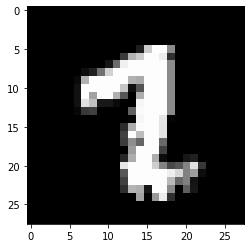

In [218]:
index=c[9]
sample_image=images_test[index,:,:,:]
pixels=sample_image.reshape(28,28)
plt.imshow(pixels,cmap='gray')
print('real',np.argmax(labels_test[index]))
print('predicted',np.argmax(labels_test_predicted[index]))

In [203]:
# you can make prediction directly but if you want to further train from here 
# you'll have to compile the loaded model again

In [206]:
model_loaded.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [207]:
model_loaded.fit(images_train,labels_train,validation_data=(images_test,labels_test),batch_size=50,verbose=1)

1200/1200 [==============================] - 6s 5ms/step - loss: 2.9844 - accuracy: 0.9925 - val_loss: 0.8148 - val_accuracy: 0.9895
